***Importing libraries***


In [20]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm
from tensorflow. keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import LeakyReLU
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense ,Flatten ,Conv2D ,MaxPooling2D ,Dropout ,BatchNormalization ,GlobalMaxPool2D
from tensorflow.keras.optimizers import Adam
import cv2

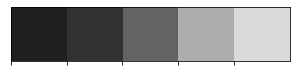

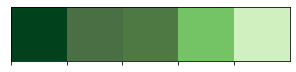

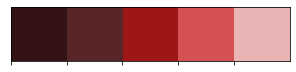

In [24]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

***Importing datas***

In [3]:
train_directory = "C:\\Users\\vijay\\Desktop\\braintumer\\Training"
test_directory =  "C:\\Users\\vijay\\Desktop\\braintumer\\Testing"

In [4]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

class_map = {
    'no_tumor': 0,
    'glioma_tumor': 1,
    'meningioma_tumor': 2,
    'pituitary_tumor': 3
}

inverse_class_map = {
    0: 'no_tumor',
    1: 'glioma_tumor',
    2: 'meningioma_tumor',
    3: 'pituitary_tumor'
}

In [5]:
IMAGE = []
LABELS = []

for label in labels:
    folderPath = os.path.join(train_directory, label)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img,(200, 200))
        IMAGE.append(img)
        LABELS.append(class_map[label])
            
        
for label in labels:
    folderPath = os.path.join(test_directory, label)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(200, 200))
        IMAGE.append(img)
        LABELS.append(class_map[label])
        
X = np.array(IMAGE)
y = np.array(LABELS)

100%|██████████| 74/74 [00:00<00:00, 143.70it/s]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, to_categorical(y), test_size=0.1, random_state=42)

***Visualizing few images***

<Figure size 1152x864 with 0 Axes>

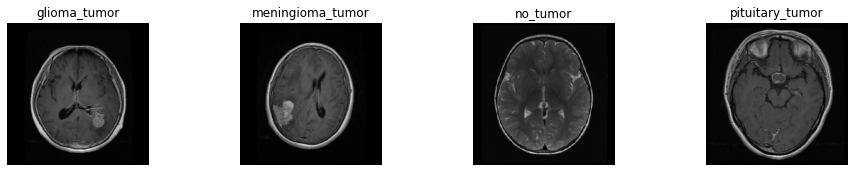

In [7]:
plt.figure(figsize=(16, 12))
path = "C:\\Users\\vijay\\Desktop\\braintumer\\Training\\"
plt.figure(figsize=(16, 12))


fileNames = ['glioma_tumor/gg (10).jpg', 'meningioma_tumor/m (108).jpg', 'no_tumor/image (16).jpg', 'pituitary_tumor/p (12).jpg']
fileLabels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

for i in range(4):
    ax = plt.subplot(4, 4, i + 1)
    img = mpimg.imread(path + fileNames[i])
    img = cv2.resize(img, (200, 200))
    plt.imshow(img)
    plt.title(fileLabels[i])
    plt.axis("off")



***Building CNN using ReLu as activation function***

In [8]:

model =Sequential()

#Hidden layer - 1
model.add(Conv2D(filters = 16, kernel_size = (5, 5),
                 strides = 1, padding='valid', activation = 'relu', input_shape=(200,200,3)))
model.add(MaxPooling2D(pool_size = (2,2)))

#Hidden layer - 2
model.add(Conv2D(filters = 32, kernel_size = (5, 5),
                 strides = 1, padding='valid', activation = 'relu' ))
model.add(MaxPooling2D(pool_size = (2, 2)))

#Hidden layer - 3
model.add(Conv2D(filters = 64, kernel_size = (5, 5),
                 strides = 1, padding='valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

#Hidden layer - 4
model.add(Conv2D(filters = 128, kernel_size = (5, 5),
                 strides = 1, padding ='valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

#Hidden layer - 5
model.add(Conv2D(filters= 256, kernel_size = (5, 5),
                 strides = 1, padding ='valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

#flatten layer
model.add(Flatten())
model.add(Dense((16), activation = 'relu'))

#output layer
model.add(Dense((4), activation = 'softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 196, 196, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 94, 94, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 47, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 43, 43, 64)        51264     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 21, 21, 64)       0

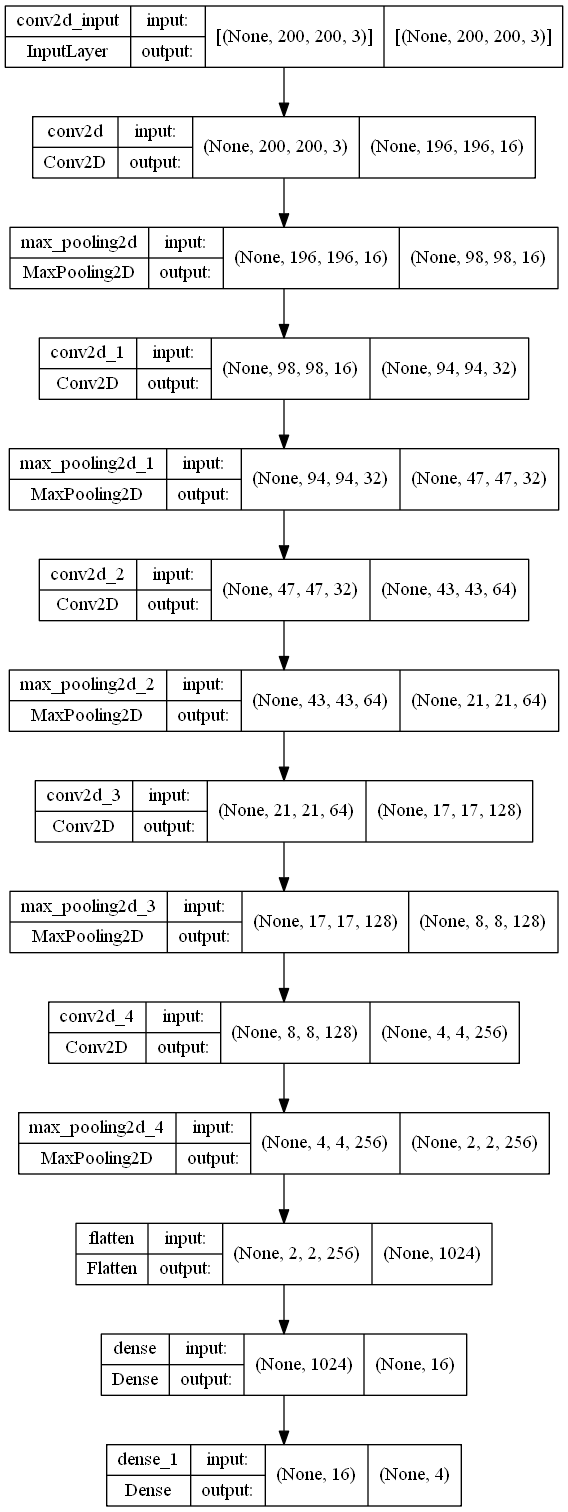

In [18]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True, 
           show_layer_names=True)

In [10]:
model.compile(optimizer = 'adam',
              loss='categorical_crossentropy',metrics=['accuracy'])

***Image augumentation***

In [11]:
datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

***Compileing the model***

In [12]:
history = model.fit(datagen.flow(X_train, y_train, batch_size = 64), validation_data = (X_test, y_test),
                     epochs = 20)

Epoch 1/20
46/46 [==============================] - 117s 3s/step - loss: 1.3111 - accuracy: 0.3558 - val_loss: 96.0075 - val_accuracy: 0.4159
Epoch 2/20
46/46 [==============================] - 119s 3s/step - loss: 1.0674 - accuracy: 0.5482 - val_loss: 60.7003 - val_accuracy: 0.3425
Epoch 3/20
46/46 [==============================] - 116s 3s/step - loss: 0.8698 - accuracy: 0.6513 - val_loss: 231.0281 - val_accuracy: 0.2661
Epoch 4/20
46/46 [==============================] - 131s 3s/step - loss: 0.7175 - accuracy: 0.7082 - val_loss: 298.4760 - val_accuracy: 0.3272
Epoch 5/20
46/46 [==============================] - 114s 2s/step - loss: 0.6530 - accuracy: 0.7453 - val_loss: 367.1369 - val_accuracy: 0.2110
Epoch 6/20
46/46 [==============================] - 114s 2s/step - loss: 0.5378 - accuracy: 0.7845 - val_loss: 439.3273 - val_accuracy: 0.3150
Epoch 7/20
46/46 [==============================] - 114s 2s/step - loss: 0.5096 - accuracy: 0.8076 - val_loss: 131.0406 - val_accuracy: 0.4924
E

***Visualizing accuracy and loss***

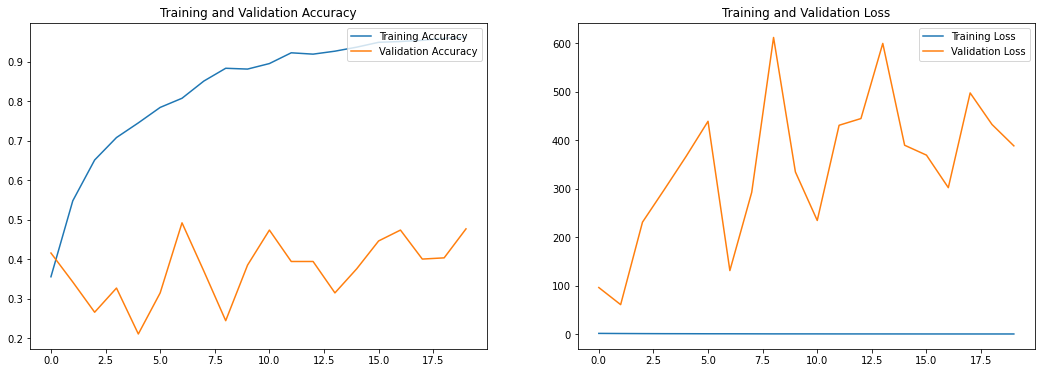

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['accuracy']))

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(range(len(history.history['accuracy'])), acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

***Confusion matrix***

In [22]:
predicted_labels = model.predict(X_test)
predicted_labels = [np.argmax(i) for i in predicted_labels]
original_labels =[np.argmax(i) for i in y_test]
y_test_new = np.argmax(y_test,axis=1)

from sklearn.metrics import classification_report,confusion_matrix
conf_mat = confusion_matrix(original_labels, predicted_labels)
report = classification_report(original_labels, predicted_labels)
print(conf_mat)
print(report)

[[45  0  0  0]
 [65 18 34  0]
 [24  1 61  1]
 [39  0  7 32]]
              precision    recall  f1-score   support

           0       0.26      1.00      0.41        45
           1       0.95      0.15      0.26       117
           2       0.60      0.70      0.65        87
           3       0.97      0.41      0.58        78

    accuracy                           0.48       327
   macro avg       0.69      0.57      0.47       327
weighted avg       0.77      0.48      0.46       327



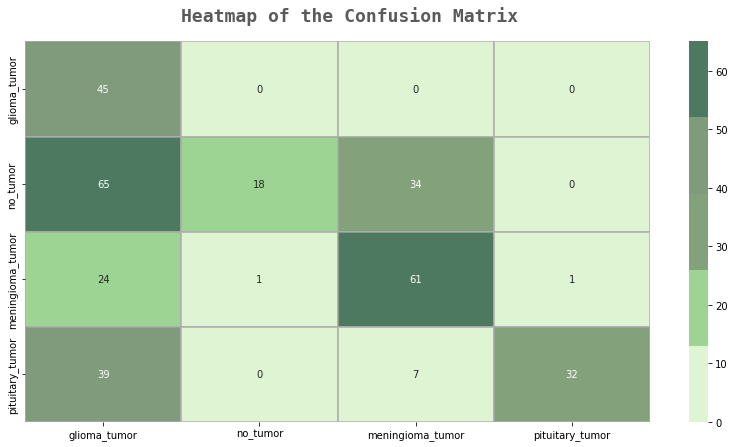

In [25]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new, predicted_labels),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()